In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_14608\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
df = pd.read_csv('C:/Users/USER/Downloads/MachineLearning/DATA/modified_diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0


In [20]:
df.isnull().sum()

gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [23]:
df['gender'].value_counts()

gender
Female     58549
Male       41429
Other         18
unknown        1
Name: count, dtype: int64

In [24]:
df[df['gender']=='Female'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,58549.0,41.946073,22.075076,-4.920000,25.000000,42.00000,59.000000,84.000000
hypertension,58549.0,0.071684,0.257965,0.000000,0.000000,0.00000,0.000000,1.000000
heart_disease,58549.0,0.026661,0.161093,0.000000,0.000000,0.00000,0.000000,1.000000
bmi,58549.0,27.449151,7.195021,3.629572,23.124499,26.85812,30.403908,90.363434
HbA1c_level,58549.0,5.509448,1.063660,3.500000,4.800000,5.80000,6.200000,9.000000
blood_glucose_level,58549.0,137.469590,40.103086,80.000000,100.000000,140.00000,159.000000,300.000000
diabetes,58549.0,0.076193,0.265308,0.000000,0.000000,0.00000,0.000000,1.000000


In [25]:
df[df['gender']=='Male'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41429.0,40.613966,23.461945,-4.84000,21.000000,42.000000,59.000000,84.000000
hypertension,41429.0,0.079365,0.270310,0.00000,0.000000,0.000000,0.000000,1.000000
heart_disease,41429.0,0.057448,0.232699,0.00000,0.000000,0.000000,0.000000,1.000000
bmi,41429.0,27.131953,6.538081,6.19352,23.761222,27.104726,30.148321,95.790427
HbA1c_level,41429.0,5.553038,1.080006,3.50000,4.800000,5.800000,6.200000,9.000000
blood_glucose_level,41429.0,138.889570,41.538367,80.00000,100.000000,140.000000,159.000000,300.000000
diabetes,41429.0,0.097492,0.296630,0.00000,0.000000,0.000000,0.000000,1.000000


In [26]:
df[df['gender']=='unknown']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0


In [27]:
df.at[0, 'gender'] = 'Male'

In [28]:
df['gender'].value_counts()

gender
Female    58549
Male      41430
Other        18
Name: count, dtype: int64

In [29]:
df[df['age']<0]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
226,Male,-2.00,0,0,No Info,24.869598,5.7,85,0
271,Male,-3.00,0,0,No Info,15.946293,6.0,140,0
296,Female,-3.00,0,0,No Info,15.144665,5.0,159,0
360,Male,-3.00,0,0,No Info,15.180772,6.5,130,0
458,Male,-1.00,0,0,No Info,17.511669,6.0,130,0
...,...,...,...,...,...,...,...,...,...
99808,Female,-2.00,0,0,never,28.327815,3.5,90,0
99906,Male,-1.00,0,0,No Info,12.530383,6.6,145,0
99916,Female,-1.52,0,0,No Info,26.196254,4.5,140,0
99940,Male,-2.00,0,0,No Info,18.882412,6.1,145,0


In [33]:
for i in df['age']:
    if i < 0:
        indices = df[df['age'] == i].index
        df.loc[indices, 'age'] = df['age'].mean()

In [34]:
df[df['age']<0]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [35]:
df['smoking_history'].value_counts()

smoking_history
No Info        35815
never          35094
former          9352
current         9285
not current     6447
ever            4004
Name: count, dtype: int64

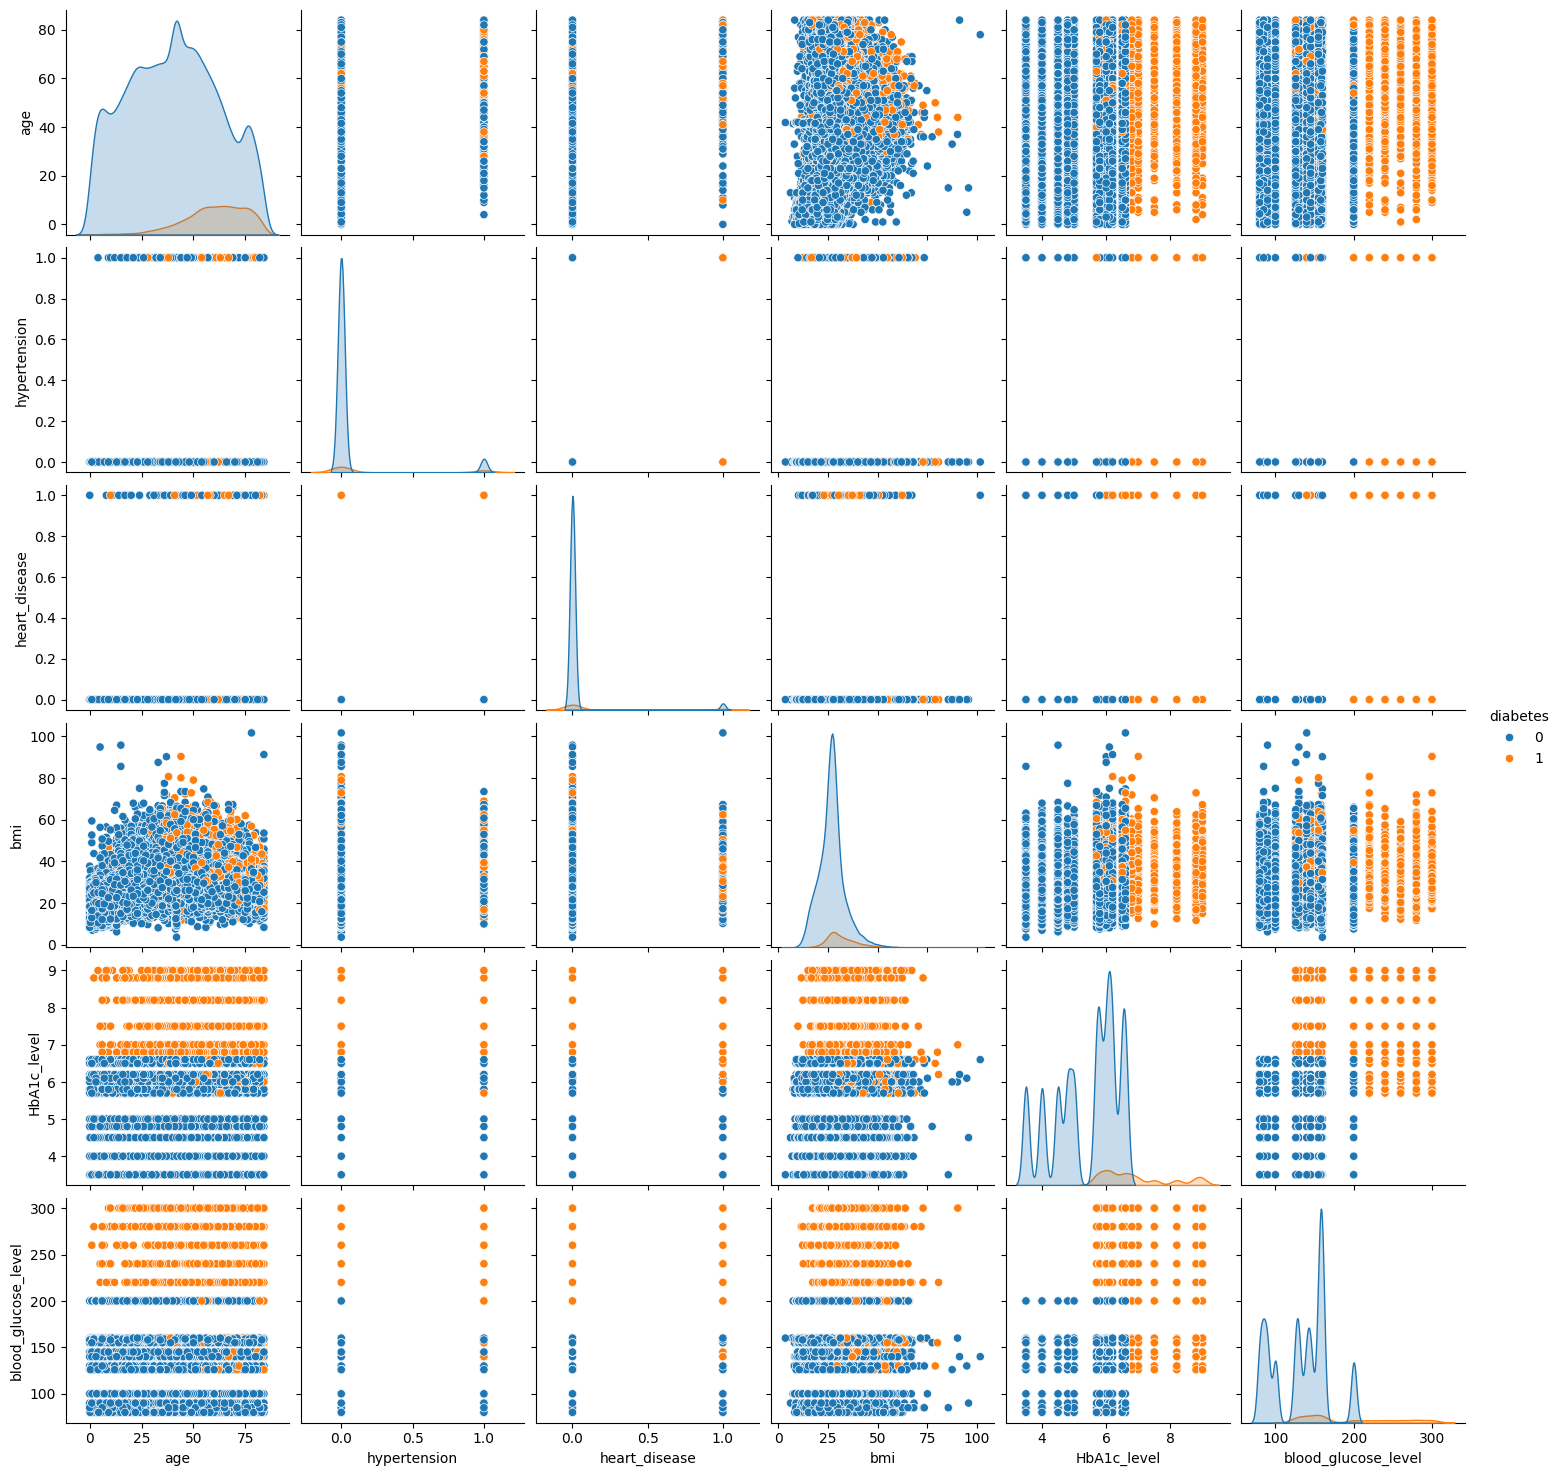

In [36]:
sns.pairplot(df,hue='diabetes')

<Axes: xlabel='bmi', ylabel='age'>

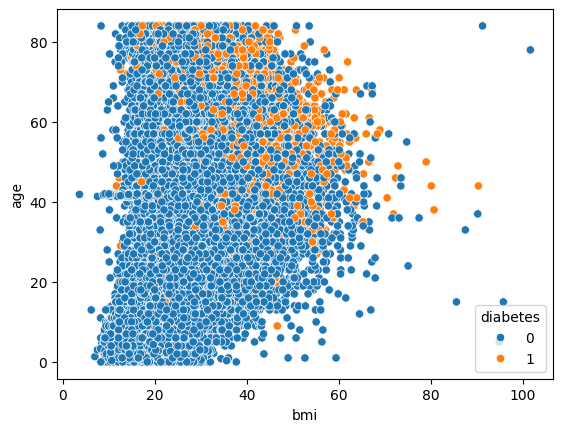

In [37]:
sns.scatterplot(df, x='bmi', y='age', hue='diabetes')

In [38]:
df[(df['age']>70) & (df['bmi']>90)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,78.0,0,1,never,101.665015,6.6,140,0
96066,Male,84.0,0,0,never,91.267779,6.2,140,0


In [39]:
drop_index = df[(df['age']>70) & (df['bmi']>90)].index

In [40]:
df = df.drop(drop_index, axis=0)

<Axes: xlabel='bmi', ylabel='age'>

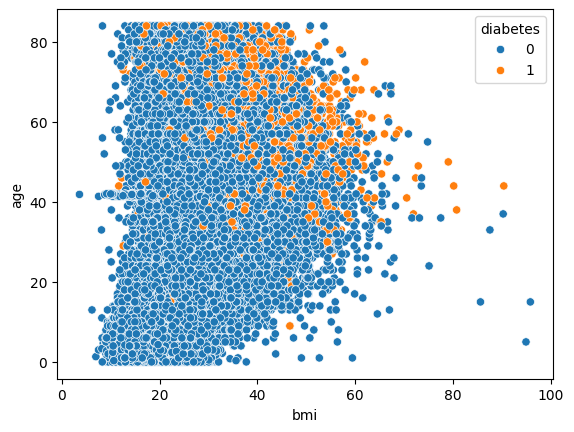

In [41]:
sns.scatterplot(df, x='bmi', y='age', hue='diabetes')

In [42]:
df[(df['age']<20) & (df['bmi']>90)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
76093,Male,15.0,0,0,No Info,95.790427,4.5,90,0
87843,Male,5.0,0,0,No Info,94.896635,6.1,130,0


In [43]:
drop_index1 = df[(df['age']<20) & (df['bmi']>90)].index

In [44]:
drop_index1

Index([76093, 87843], dtype='int64')

In [45]:
df = df.drop(drop_index1, axis=0)

<Axes: xlabel='bmi', ylabel='age'>

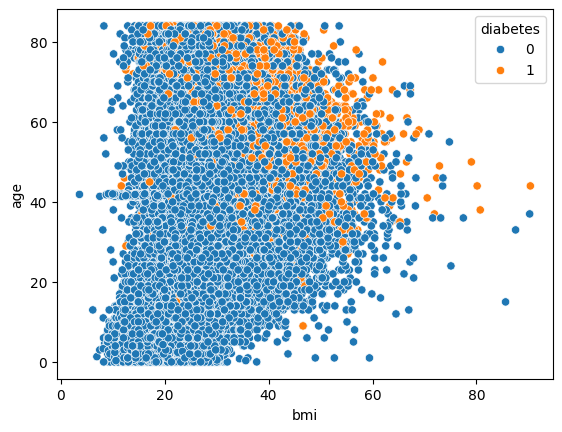

In [46]:
sns.scatterplot(df, x='bmi', y='age', hue='diabetes')

In [47]:
df.duplicated()

4        False
5        False
6        False
7        False
8        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 99993, dtype: bool

In [48]:
df[df.duplicated()==True]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


1. Classification

<Axes: >

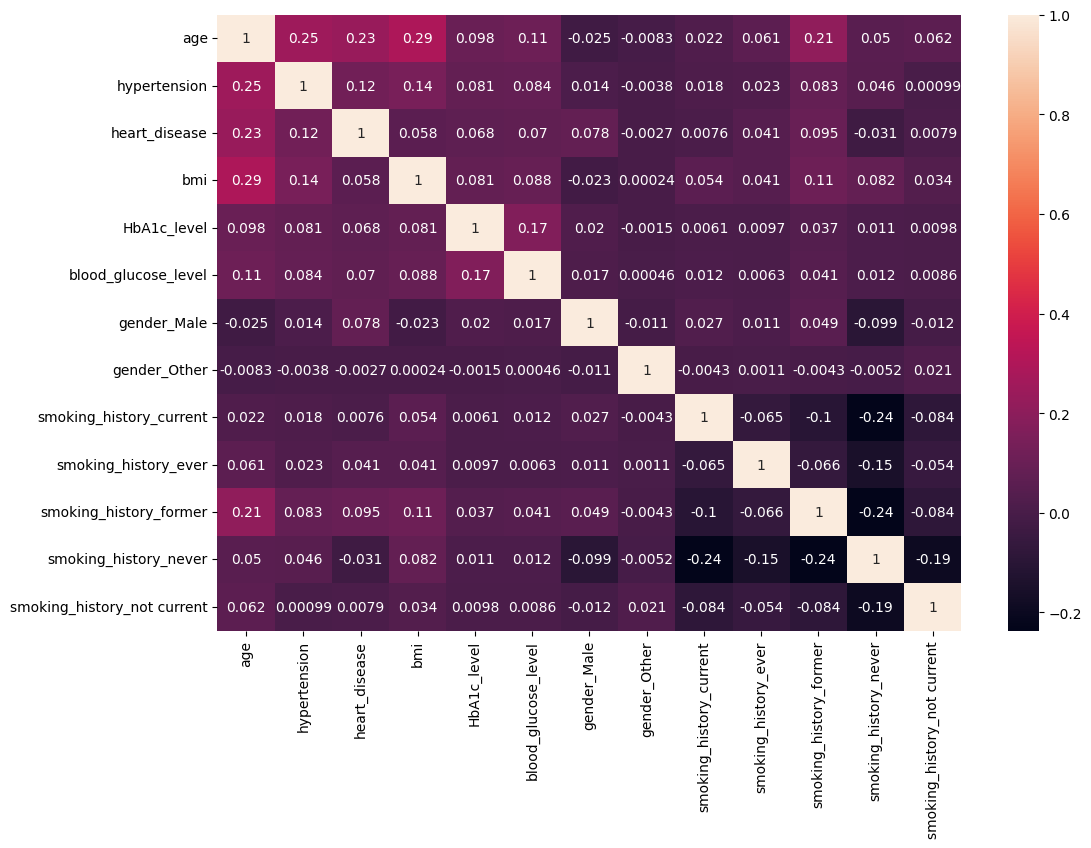

In [49]:
X = df.drop('diabetes', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['diabetes']
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()

1.1 SVM algurithm

In [51]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
accuracy_score(y_test, y_pred)

0.95996399759984

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27437
           1       0.92      0.58      0.71      2561

    accuracy                           0.96     29998
   macro avg       0.94      0.79      0.85     29998
weighted avg       0.96      0.96      0.96     29998



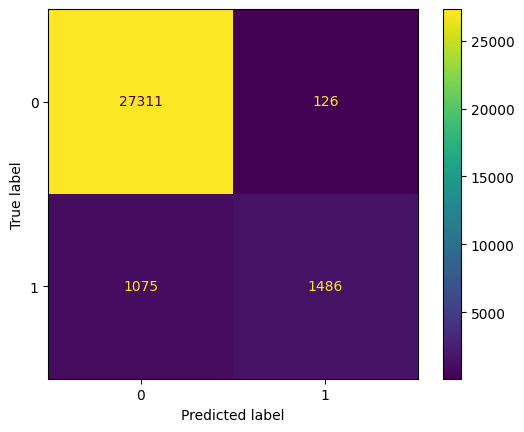

In [55]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [83]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_grid = {'C':[0.01,0.1,1,10,100],
              'kernel':['linear','rbf']}
grid_model = GridSearchCV(svc,param_grid)

In [84]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']})

In [85]:
grid_model.best_params_

{'C': 100, 'kernel': 'rbf'}

In [86]:
preds = grid_model.predict(X_test)

In [87]:
accuracy_score(y_test, preds)

0.9633975598373224

In [88]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27437
           1       1.00      0.57      0.73      2561

    accuracy                           0.96     29998
   macro avg       0.98      0.79      0.85     29998
weighted avg       0.96      0.96      0.96     29998



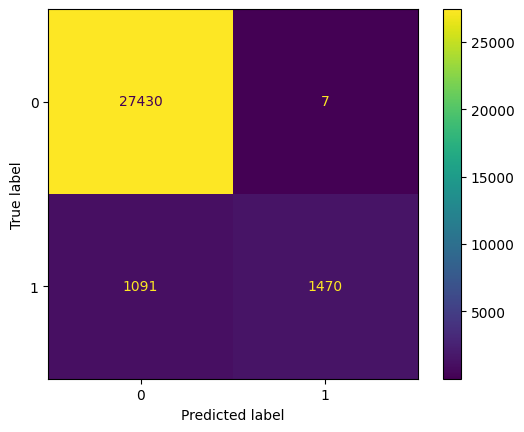

In [89]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

1.2 Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
tree_preds = tree_model.predict(X_test)

In [58]:
accuracy_score(y_test, tree_preds)

0.9530635375691713

In [59]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27437
           1       0.72      0.74      0.73      2561

    accuracy                           0.95     29998
   macro avg       0.85      0.86      0.85     29998
weighted avg       0.95      0.95      0.95     29998



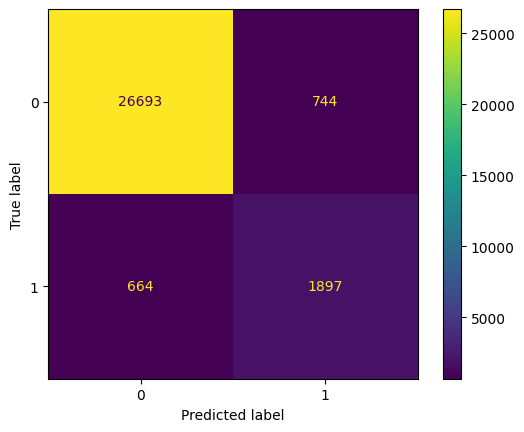

In [60]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)

2. Clustering

<Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>

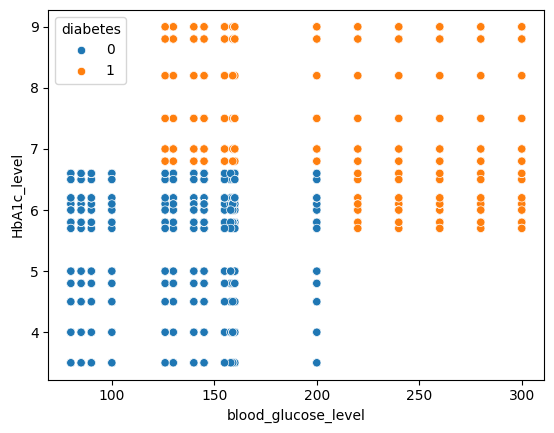

In [61]:
sns.scatterplot(df, x='blood_glucose_level', y='HbA1c_level', hue='diabetes')

2.1 K-Means

In [62]:
data = df.iloc[:,[6,7]].values
scaled_data = scaler.fit_transform(data)
scaled_data.shape

(99993, 2)

In [63]:
from sklearn.cluster import KMeans
def draw_cluster_plot(data):
    wcss = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,10), wcss)
    plt.title('The Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

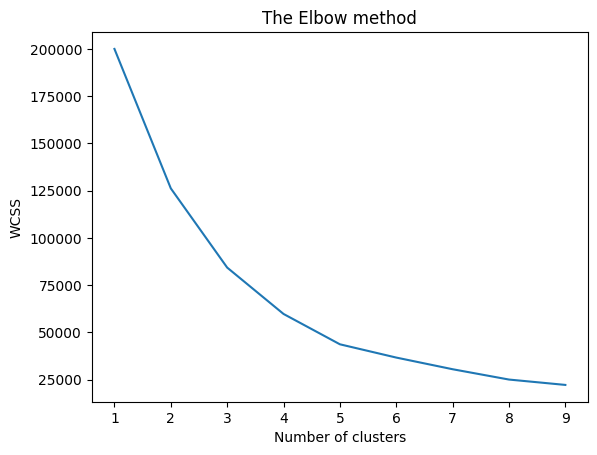

In [64]:
draw_cluster_plot(scaled_data)

In [65]:
def find_clusters(data,xlabel,ylabel,n):
    kmeans = KMeans(n_clusters=n,init='k-means++',max_iter=300,n_init=10)
    labels = kmeans.fit_predict(data)
    np.unique(labels)
    plt.scatter(data[labels == 0,0], data[labels == 0,1], s=10, c='blue')
    plt.scatter(data[labels == 1,0], data[labels == 1,1], s=10, c='red')
    plt.scatter(data[labels == 2,0], data[labels == 2,1], s=10, c='green')
    plt.scatter(data[labels == 3,0], data[labels == 3,1], s=10, c='pink')
    plt.scatter(data[labels == 4,0], data[labels == 4,1], s=10, c='purple')

    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=30, c='black')
    plt.title('Clusters results on the dataset')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

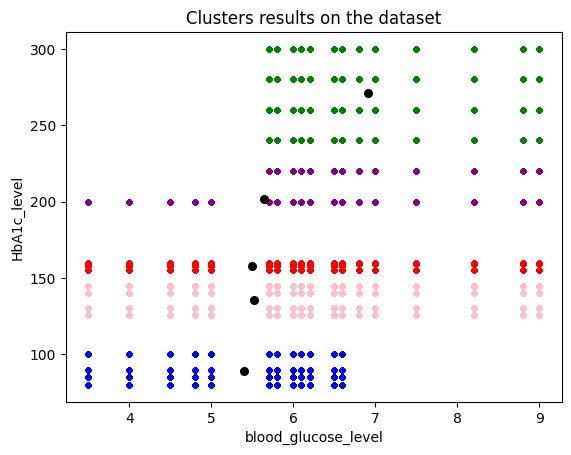

In [66]:
find_clusters(data,'blood_glucose_level','HbA1c_level',5)

<Axes: xlabel='age', ylabel='bmi'>

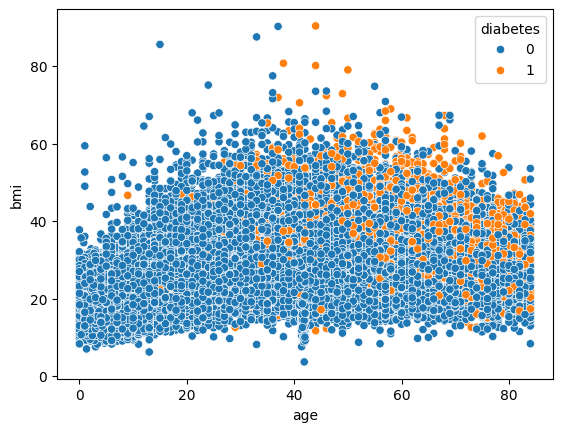

In [67]:
sns.scatterplot(df, x='age', y='bmi', hue='diabetes')

In [68]:
data1 = df.iloc[:,[1,5]].values
scaled_data1 = scaler.fit_transform(data1)
scaled_data1.shape

(99993, 2)

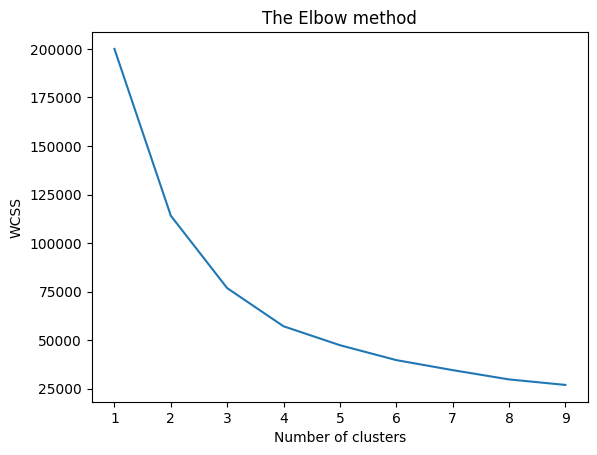

In [69]:
draw_cluster_plot(scaled_data1)

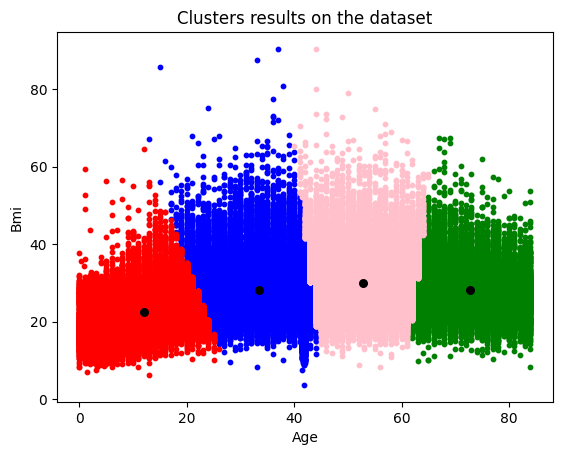

In [70]:
find_clusters(data1,'Age','Bmi',4)

2.2 Hierarchical(HC)

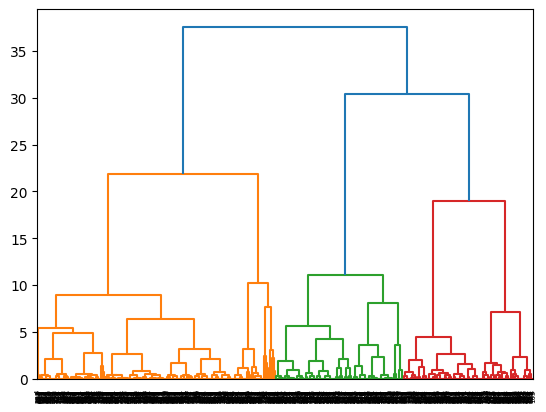

In [71]:
import scipy.cluster.hierarchy as sch
data_float32 = data.astype('float32')
sample_size = 1000 
data_sampled = df.iloc[:,[6,7]].sample(n=sample_size, random_state=42)
scaled_data_sample = scaler.fit_transform(data_sampled)

dendrogram = sch.dendrogram(sch.linkage(scaled_data_sample, method='ward'))

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
def find_hc_cluster(data,xlabel,ylabel,n):
    agglo = AgglomerativeClustering(metric='euclidean',linkage='ward',n_clusters=n)
    labels = agglo.fit_predict(data)
    np.unique(labels)
    plt.scatter(data[labels == 0,0], data[labels == 0,1], s=10, c='blue')
    plt.scatter(data[labels == 1,0], data[labels == 1,1], s=10, c='red')
    plt.scatter(data[labels == 2,0], data[labels == 2,1], s=10, c='green')
    plt.scatter(data[labels == 3,0], data[labels == 3,1], s=10, c='pink')
    plt.scatter(data[labels == 4,0], data[labels == 4,1], s=10, c='purple')

    plt.title('Clusters results on the dataset')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

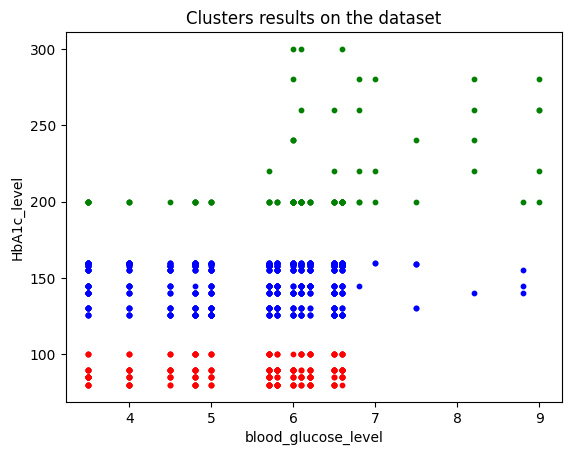

In [80]:
find_hc_cluster(data_sampled.values,'blood_glucose_level','HbA1c_level',3)

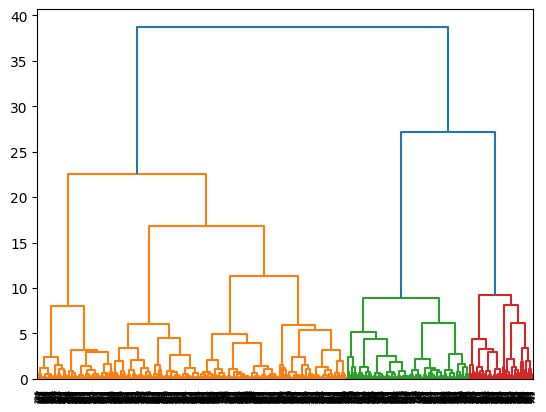

In [75]:
data_float32 = data1.astype('float32')
data_sampled1 = df.iloc[:,[1,5]].sample(n=sample_size, random_state=42)
scaled_data_sample1 = scaler.fit_transform(data_sampled1)

dendrogram1 = sch.dendrogram(sch.linkage(scaled_data_sample1, method='ward'))

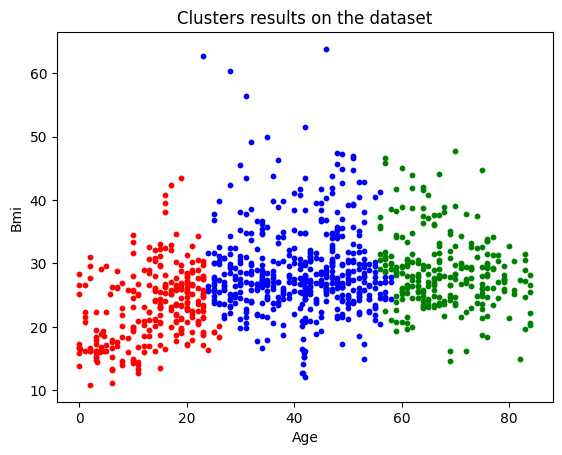

In [79]:
find_hc_cluster(data_sampled1.values,'Age','Bmi',3)